In [164]:
#read the csv file grad_norms.csv and plot the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [165]:
num_tasks = 20
task_len = 237
it_per_batch = 3
discard_first_n = 3
total_length = task_len*num_tasks*it_per_batch-discard_first_n

#read the csv file
df = pd.read_csv('grad_data.csv')
df = df.head(total_length)

df['grad_diff'] = df['New_data_Grad_Norm']-df['Buffer_data_Grad_Norm']

df['new_task'] = np.zeros(total_length)
for i in range(1, num_tasks):
    df.loc[i*task_len*it_per_batch-discard_first_n, 'new_task'] = 1




In [166]:
#plot the data with plotly. Put a vertical dashed line every 711 steps (strating counting from -2). Put a vertical dotted line every 237 steps (strating counting from -2)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['grad_diff'], mode='lines', name='grad_diff'))
fig.update_layout(title='Grad Norm difference new data - old data', xaxis_title='step', yaxis_title='grad_diff')

#add a vertical line where new_task is 1
for i in range(len(df)):
    if df.loc[i, 'new_task'] == 1:
        fig.add_shape(
            type="line", x0=i, y0=df['grad_diff'].min(), x1=i, y1=df['grad_diff'].max(),
            line=dict(width=1, dash="dash")
        )

fig.show()


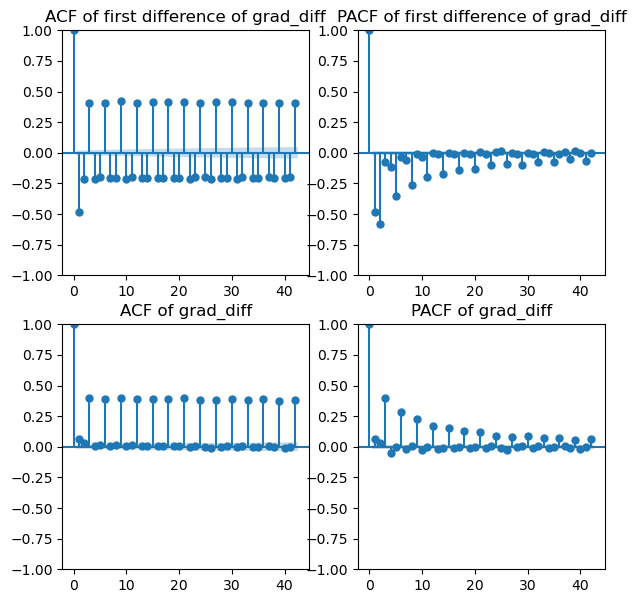

In [167]:
#compute and plot the acf and pacf of the first difference of the difference and of the difference itself
#Put the plots in a 2x2 grid


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
plot_acf(df['grad_diff'].diff().dropna(), ax=axs[0, 0])
axs[0, 0].set_title('ACF of first difference of grad_diff')
plot_pacf(df['grad_diff'].diff().dropna(), ax=axs[0, 1])
axs[0, 1].set_title('PACF of first difference of grad_diff')
plot_acf(df['grad_diff'], ax=axs[1, 0])
axs[1, 0].set_title('ACF of grad_diff')
plot_pacf(df['grad_diff'], ax=axs[1, 1])
axs[1, 1].set_title('PACF of grad_diff')
plt.show()


In [168]:
#fit an arima model
from pmdarima import auto_arima

#fit the model
model = auto_arima(df['grad_diff'], seasonal=False, max_p=2, max_q=2, suppress_warnings=True)

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                14217
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -32904.778
Date:                Thu, 13 Jun 2024   AIC                          65821.555
Time:                        00:56:52   BIC                          65866.928
Sample:                             0   HQIC                         65836.649
                              - 14217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.000     -1.452      0.146      -0.001       0.000
ar.L1         -0.6281      0.023    -26.730      0.000      -0.674      -0.582
ar.L2         -0.2491      0.008    -30.676      0.0

In [169]:
#Plot with plotly the first both Buffer_data_Grad_Norm and New_data_Grad_Norm
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Buffer_data_Grad_Norm'], mode='lines', name='Buffer_data_Grad_Norm'))
fig.add_trace(go.Scatter(x=df.index, y=df['New_data_Grad_Norm'], mode='lines', name='New_data_Grad_Norm'))
fig.update_layout(title='Buffer_data_Grad_Norm and New_data_Grad_Norm', xaxis_title='step', yaxis_title='grad_norm')

#add a vertical line where new_task is 1
for i in range(len(df)):
    if df.loc[i, 'new_task'] == 1:
        fig.add_shape(
            type="line", x0=i, y0=df['Buffer_data_Grad_Norm'].min(), x1=i, y1=df['Buffer_data_Grad_Norm'].max(),
            line=dict(width=1, dash="dash")
        )
fig.show()





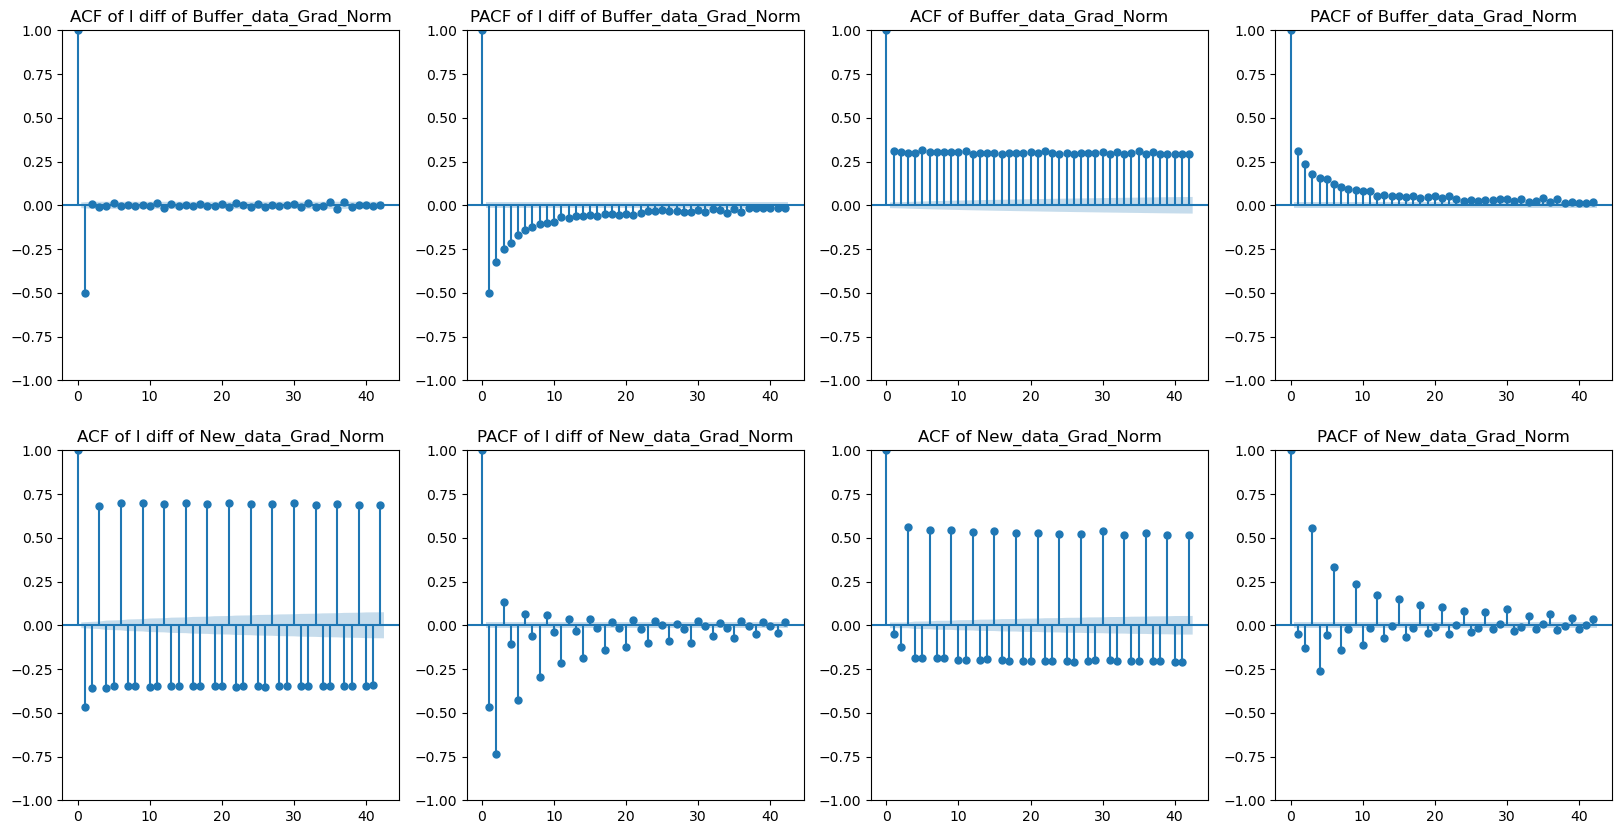

In [170]:
#plot acf and pacf of the Buffer_data_Grad_Norm and New_data_Grad_Norm both for the difference and the original data
#Put the plots in a 2x4 grid
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
plot_acf(df['Buffer_data_Grad_Norm'].diff().dropna(), ax=axs[0, 0])
axs[0, 0].set_title('ACF of I diff of Buffer_data_Grad_Norm')
plot_pacf(df['Buffer_data_Grad_Norm'].diff().dropna(), ax=axs[0, 1])
axs[0, 1].set_title('PACF of I diff of Buffer_data_Grad_Norm')
plot_acf(df['Buffer_data_Grad_Norm'], ax=axs[0, 2])
axs[0, 2].set_title('ACF of Buffer_data_Grad_Norm')
plot_pacf(df['Buffer_data_Grad_Norm'], ax=axs[0, 3])
axs[0, 3].set_title('PACF of Buffer_data_Grad_Norm')
plot_acf(df['New_data_Grad_Norm'].diff().dropna(), ax=axs[1, 0])
axs[1, 0].set_title('ACF of I diff of New_data_Grad_Norm')
plot_pacf(df['New_data_Grad_Norm'].diff().dropna(), ax=axs[1, 1])
axs[1, 1].set_title('PACF of I diff of New_data_Grad_Norm')
plot_acf(df['New_data_Grad_Norm'], ax=axs[1, 2])
axs[1, 2].set_title('ACF of New_data_Grad_Norm')
plot_pacf(df['New_data_Grad_Norm'], ax=axs[1, 3])
axs[1, 3].set_title('PACF of New_data_Grad_Norm')
plt.show()


In [171]:
#fit an arima 
model_buffer = auto_arima(df['Buffer_data_Grad_Norm'], seasonal=False, max_p=2, max_q=2, suppress_warnings=True)
model_new = auto_arima(df['New_data_Grad_Norm'], seasonal=False, max_p=2, max_q=2, suppress_warnings=True)

print(model_buffer.summary())
print(model_new.summary())




                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                14217
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -27155.083
Date:                Thu, 13 Jun 2024   AIC                          54314.167
Time:                        00:58:30   BIC                          54329.291
Sample:                             0   HQIC                         54319.198
                              - 14217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9802      0.002   -595.905      0.000      -0.983      -0.977
sigma2         2.6704      0.030     90.314      0.000       2.612       2.728
Ljung-Box (L1) (Q):                   0.90   Jarque-

In [172]:
#plot df.Cosine_Similarity
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Cosine_Similarity'], mode='lines', name='Cosine_Similarity'))
fig.update_layout(title='Cosine_Similarity', xaxis_title='step', yaxis_title='Cosine_Similarity')

#add a vertical line where new_task is 1
for i in range(len(df)):
    if df.loc[i, 'new_task'] == 1:
        fig.add_shape(
            type="line", x0=i, y0=df['Cosine_Similarity'].min(), x1=i, y1=df['Cosine_Similarity'].max(),
            line=dict(width=1, dash="dash")
        )
        
#Add to the plot the 10 periods moving average
fig.add_trace(go.Scatter(x=df.index, y=df['Cosine_Similarity'].rolling(window=100).mean(), mode='lines', name='100 periods moving average'))


fig.show()


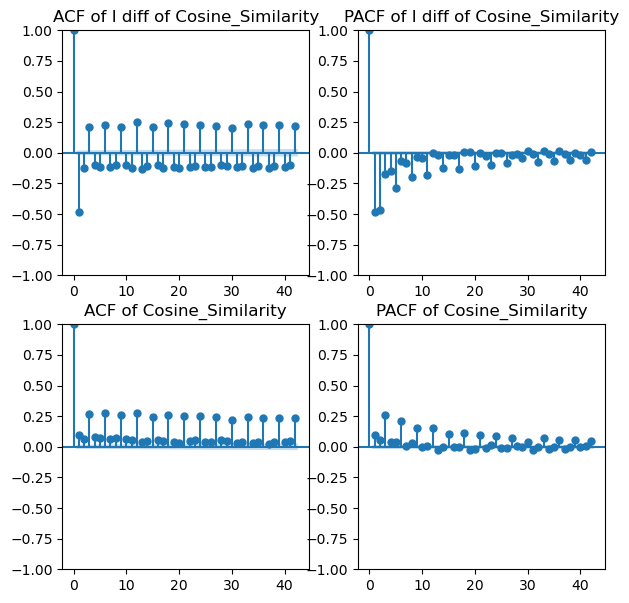

In [173]:
#plot acf and pacf of the Cosine_Similarity both for the difference and the original data
#Put the plots in a 2x2 grid

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
plot_acf(df['Cosine_Similarity'].diff().dropna(), ax=axs[0, 0])
axs[0, 0].set_title('ACF of I diff of Cosine_Similarity')
plot_pacf(df['Cosine_Similarity'].diff().dropna(), ax=axs[0, 1])
axs[0, 1].set_title('PACF of I diff of Cosine_Similarity')
plot_acf(df['Cosine_Similarity'], ax=axs[1, 0])
axs[1, 0].set_title('ACF of Cosine_Similarity')
plot_pacf(df['Cosine_Similarity'], ax=axs[1, 1])
axs[1, 1].set_title('PACF of Cosine_Similarity')
plt.show()



In [174]:
#Fit an arima model
model_cosine = auto_arima(df['Cosine_Similarity'], seasonal=False, max_p=2, max_q=2, suppress_warnings=True)

print(model_cosine.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                14217
Model:               SARIMAX(2, 1, 2)   Log Likelihood               18787.095
Date:                Thu, 13 Jun 2024   AIC                         -37564.190
Time:                        00:59:44   BIC                         -37526.380
Sample:                             0   HQIC                        -37551.612
                              - 14217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5321      0.032    -16.436      0.000      -0.596      -0.469
ar.L2         -0.1413      0.005    -26.281      0.000      -0.152      -0.131
ma.L1         -0.4672      0.033    -14.328      0.0